<a href="https://colab.research.google.com/github/Chirayusm1/parkinson-disease-prediction/blob/main/Predicting_Parkinson_s_Disease_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PARKINSON S DISEASE PREDICTION**
###MINI PROJECT


#**IMPORTING DATASET**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/parkinsons.csv");

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


###ATTRIBUTE INFORMATION

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency

MDVP:Shimmer,

MDVP:Shimmer(dB),

Shimmer:APQ3,

Shimmer:APQ5,

MDVP:APQ,

Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation






#**DATA CLEANING**

In [ ]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
len(df.name.unique())

195

name variable is not required since all are unique so we shall remove it


In [ ]:
len(df.status.unique())
#either 1 or 0

2

In [ ]:
df=df.drop(['name'],axis=1)

In [ ]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
df.shape

(195, 23)

In [ ]:
df[df['status']==1].shape

(147, 23)

In [ ]:
df[df['status']==0].shape

(48, 23)

In [ ]:
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#**SCALING THE INPUTS**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x=df.drop(['status'],axis=1)
y=df['status']

In [ ]:
stdscaler=StandardScaler()
x=np.array(stdscaler.fit_transform(x))

In [ ]:
x
#scale between -1 to 1

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

#**TRAIN TEST SPLIT**
test set=20%
train set=80%

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(156, 22)
(39, 22)
(156,)
(39,)


In [ ]:
#to put as arrays of numpy
X_train=np.array(X_train)

X_test=np.array(X_test)

Y_train=np.array(Y_train)

Y_test=np.array(Y_test)


In [ ]:
len(X_train)

156

In [ ]:
len(X_test)

39

In [ ]:
len(Y_train)

156

In [ ]:
len(Y_test)

39

#**ML ALGORITHMS**
#**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1=LinearRegression()

In [ ]:
model1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_predmod1=model1.predict(X_test)
Y_predmod1

array([0.51464502, 0.92291805, 1.08895196, 0.93072429, 0.39722818,
       0.96450257, 0.51665718, 0.73428536, 0.96425774, 0.89648295,
       0.54933081, 1.04009737, 1.02683814, 1.02090193, 0.52986194,
       0.21476581, 1.07171961, 0.93419406, 0.55144217, 0.87538823,
       1.17667136, 0.53241189, 0.40486539, 0.77032915, 0.94973256,
       0.79196182, 0.95604616, 1.05056541, 0.02141046, 0.08635714,
       0.86404109, 0.73424635, 1.07673007, 0.16402396, 0.26651789,
       0.70248981, 0.5602687 , 0.96492844, 0.09659312])

need to change in binary

In [ ]:
for i,j in enumerate(Y_predmod1):
  if(j<0.5):
    Y_predmod1[i]=0
  else:
    Y_predmod1[i]=1
print(Y_predmod1)
Y_predmod1.shape

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.]


(39,)

In [ ]:
print(Y_test)

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]


In [ ]:
print("X test"," ","Y test")
for i,j in zip(Y_predmod1,Y_test):
  print(i,"        ",j)


X test   Y test
1.0          1
1.0          1
1.0          1
1.0          1
0.0          0
1.0          1
1.0          0
1.0          1
1.0          1
1.0          1
1.0          1
1.0          1
1.0          1
1.0          1
1.0          1
0.0          0
1.0          1
1.0          1
1.0          1
1.0          1
1.0          1
1.0          0
0.0          0
1.0          1
1.0          1
1.0          1
1.0          1
1.0          1
0.0          0
0.0          0
1.0          1
1.0          1
1.0          1
0.0          0
0.0          0
1.0          1
1.0          0
1.0          1
0.0          0


In [ ]:
print("Linear Regression Accuracy \n")
print(model1.score(X_test,Y_test)*100,"%") 

Linear Regression Accuracy 

66.34994862742182 %


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'Truth')

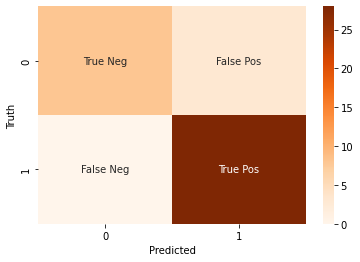

In [ ]:
cm=confusion_matrix(Y_test,Y_predmod1)
import seaborn as sn
plt.figure()
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig=sn.heatmap(cm,annot=labels,fmt='',cmap='Oranges')
#annot='True'
figure=fig.get_figure()
plt.xlabel("Predicted")
plt.ylabel("Truth")
#A confusion matrix is a table that is used to define the performance of a classification algorithm

#**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2=LogisticRegression()

In [ ]:
model2.fit(X_train,Y_train)

In [ ]:
Y_predmod2=model2.predict(X_test)
Y_predmod2

In [ ]:
Y_test

In [ ]:
print("Logistic Regression Accuracy : \n")
print(model2.score(X_test,Y_test)*100,"%")

Text(33.0, 0.5, 'Truth')

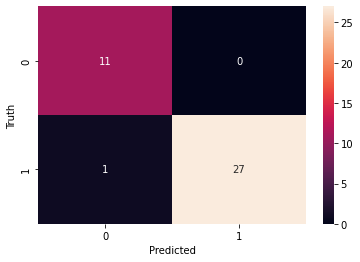

In [ ]:
cm=confusion_matrix(Y_test,Y_predmod2)
import seaborn as sn
plt.figure()
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

#**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn import tree

In [ ]:
model3=tree.DecisionTreeClassifier()

In [ ]:
model3.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_predmod3=model3.predict(X_test)
Y_predmod3

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
Y_test

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
print("Decision Tree Accuracy \n")
print(model3.score(X_test,Y_test)*100,"%")

Decision Tree Accuracy 

92.3076923076923 %


Text(33.0, 0.5, 'Truth')

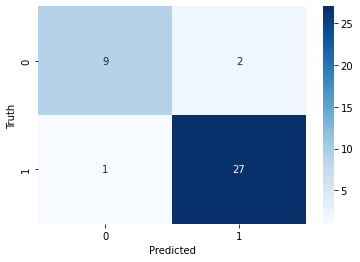

In [ ]:
cm=confusion_matrix(Y_test,Y_predmod3)
plt.figure()
sn.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")

#**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model4=SVC(C=5)

In [ ]:
model4.fit(X_train,Y_train)

SVC(C=5)

In [ ]:
Y_predmod4=model4.predict(X_test)
Y_predmod4

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
Y_test

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
print("Support Vector Machine Accuracy : \n")
print(model4.score(X_test,Y_test)*100,"%")

Support Vector Machine Accuracy : 

100.0 %


Text(33.0, 0.5, 'Truth')

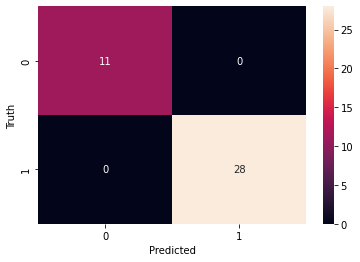

In [ ]:
cm=confusion_matrix(Y_test,Y_predmod4)
plt.figure()
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

#**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model5=RandomForestClassifier()

In [ ]:
model5.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
Y_predmod5=model5.predict(X_test)
Y_predmod5

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
Y_test

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
print("Random Forest Classifier Accuracy :\n")
print(model5.score(X_test,Y_test)*100,"%")

Random Forest Classifier Accuracy :

100.0 %


Text(33.0, 0.5, 'Truth')

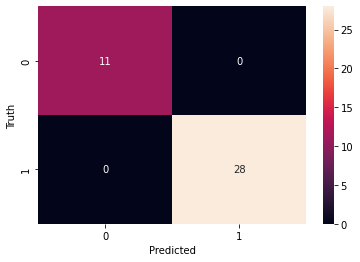

In [ ]:
cm=confusion_matrix(Y_test,Y_predmod5)
plt.figure()
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

#**Xgbooster**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model6=XGBClassifier()

In [ ]:
model6.fit(X_train,Y_train)

XGBClassifier()

In [ ]:
Y_predmod6=model6.predict(X_test)
Y_predmod6

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
Y_test

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
print("Xgbooster Accuracy : \n")
print(model6.score(X_test,Y_test)*100,"%")

Xgbooster Accuracy : 

100.0 %


Text(33.0, 0.5, 'Truth')

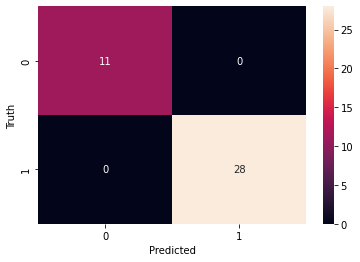

In [ ]:
cm=confusion_matrix(Y_test,Y_predmod6)
plt.figure()
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

#**NEURAL NETWORK**

In [ ]:
import tensorflow
import keras

In [ ]:
from keras.layers import Dense 

In [ ]:
from keras.backend import binary_crossentropy
model7=keras.Sequential()
model7.add(Dense(100,input_dim=22,activation='sigmoid'))
model7.add(Dense(50,activation='sigmoid'))
model7.add(Dense(50,activation='sigmoid'))
model7.add(Dense(1,activation='sigmoid'))



model7.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
model7.fit(X_train,Y_train,epochs=400)

NameError: ignored

In [ ]:
model7.evaluate(X_test,Y_test)

In [ ]:
prednn=model7.predict(X_test)
prednn
for i,j in enumerate(prednn):
  if(j<0.5):
    prednn[i]=0
  else:
    prednn[i]=1
prednn.reshape(1,39)
predd=prednn.flatten()
print(predd)
Y_test
  

In [ ]:
cm=confusion_matrix(Y_test,predd)
plt.figure()
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

#ALL MODELS ACCURACY

In [ ]:
print("Linear Regression Accuracy ")
print(model1.score(X_test,Y_test)*100,"% \n") 

print("Logistic Regression Accuracy : ")
print(model2.score(X_test,Y_test)*100,"%\n")

print("Decision Tree Accuracy ")
print(model3.score(X_test,Y_test)*100,"%\n")

print("Support Vector Machine Accuracy : ")
print(model4.score(X_test,Y_test)*100,"%\n")

print("Random Forest Classifier Accuracy :")
print(model5.score(X_test,Y_test)*100,"%\n")

print("Xgbooster Accuracy : ")
print(model6.score(X_test,Y_test)*100,"%\n")

print("NEURAL NETWORK ACCURACY ")
_,x7=model7.evaluate(X_test,Y_test)
print(x7*100,"%")

Linear Regression Accuracy 
66.34994862742182 % 

Logistic Regression Accuracy : 
97.43589743589743 %

Decision Tree Accuracy 
92.3076923076923 %

Support Vector Machine Accuracy : 
100.0 %

Random Forest Classifier Accuracy :
100.0 %

Xgbooster Accuracy : 
100.0 %

NEURAL NETWORK ACCURACY 
2/2 [==============================] - 0s 6ms/step - loss: 0.1309 - accuracy: 0.9231
92.30769276618958 %


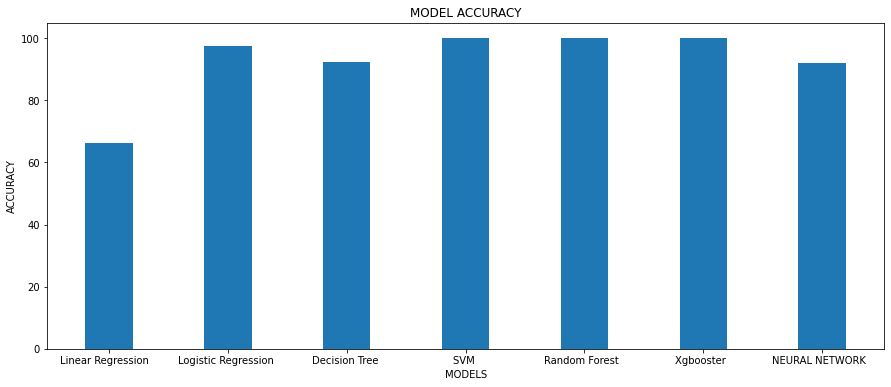

In [ ]:
import matplotlib.pyplot as plt
x=["Linear Regression   ","Logistic Regression ","Decision Tree ","SVM ", "Random Forest  ","Xgbooster  ","NEURAL NETWORK  "]
h=[66.3,97.4,92.3,100,100,100,92]
fig=plt.subplots(figsize=(15,6))
plt.bar(x,h,align="center",width=0.4)
plt.xlabel("MODELS")
plt.ylabel("ACCURACY")
plt.title("MODEL ACCURACY")
plt.show()